In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import gym
from ray.rllib.agents.dqn.apex import ApexTrainer

In [2]:
config = {
    "buffer_size": 1000000,
    "env": "cpr_gym:auto-v0",
    "framework": "torch",
    "num_gpus": 0,
    "num_workers": 6,
    "rollout_fragment_length": 1000,
}

In [3]:
agent = ApexTrainer(config)

(RolloutWorker pid=58305) 2022-05-27 14:19:06,656	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=58303) 2022-05-27 14:19:07,188	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=58304) 2022-05-27 14:19:08,042	WARNING rollout_worker.py:498 -- We've added a module fo

In [4]:
def restore_cp(agent, run, checkpoint):
    agent.restore(
        "/home/patrik/ray_results/default/"
        + run
        + f"/checkpoint_{checkpoint:06d}/checkpoint-{checkpoint}"
    )


restore_cp(agent, "APEX_cpr_gym:auto-v0_2bdfd_00000_0_2022-05-27_09-11-04", 233)

2022-05-27 14:19:23,257	INFO trainable.py:534 -- Restored on 192.168.88.100 from checkpoint: /home/patrik/ray_results/default/APEX_cpr_gym:auto-v0_2bdfd_00000_0_2022-05-27_09-11-04/checkpoint_000233/checkpoint-233
2022-05-27 14:19:23,264	INFO trainable.py:543 -- Current state after restoring: {'_iteration': 233, '_timesteps_total': 119296, '_time_total': 7581.517721414566, '_episodes_total': 337868}


In [5]:
alpha = np.arange(0.1, 0.7, 0.1)
reward = []
for a in alpha:
    env = gym.make("cpr_gym:auto-v0", alpha_min=a, alpha_max=a)
    l = []
    for i in range(50):
        obs = env.reset()
        done = False
        acc = 0
        while not done:
            obs, r, done, i = env.step(agent.compute_single_action(obs, explore=False))
            acc += r
        l.append(acc)
    reward.append(np.mean(l))
d = pd.DataFrame(dict(alpha=alpha, reward=reward))

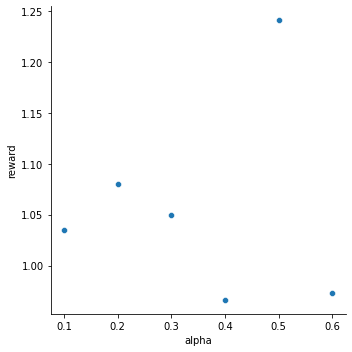

In [6]:
sns.relplot(data=d, x="alpha", y="reward")